In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
## Reading in the CSV data that I created of Spurs averages in 12 games winning where 1/4 
## is a championship and 100 percent is in playoffs.
df = pd.read_csv('Documents/spurs.csv')
df.info()

In [ ]:
## Fixing the header of the dataframe
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header

In [59]:
### Getting the column names for our dataframe that we are observing
df.columns

Index(['Rk', 'name', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS/G'],
      dtype='object', name=0)

In [64]:
## Changing the object into a float so we can visualize it better
col = [ 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS/G']

for i in col:
    df[i] = df[i].astype(float).fillna(0)

In [31]:
###Cleaning##

##Change name of column and drop NaN row
df =df.dropna(axis=1, how='all')

df = df.rename(columns={np.nan: 'Name'})
df.head()

,Rk,name,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G
1,1,Tim Duncan\duncati01,27,69,68,36.6,8.6,17.1,0.501,0.0,...,0.599,3.3,9.2,12.4,3.1,0.9,2.7,2.7,2.4,22.3
2,2,Tony Parker\parketo01,21,75,75,34.4,5.6,12.6,0.447,0.8,...,0.702,0.6,2.6,3.2,5.5,0.8,0.1,2.4,2.0,14.7
3,3,Bruce Bowen\bowenbr01,32,82,82,32.0,2.6,6.1,0.420,0.9,...,0.579,0.5,2.5,3.1,1.4,1.0,0.4,1.1,2.0,6.9
4,4,Manu Ginóbili\ginobma01,26,77,38,29.4,4.3,10.2,0.418,1.1,...,0.802,1.1,3.4,4.5,3.8,1.8,0.2,2.1,2.4,12.8
5,5,Rasho Nesterović\nestera01,27,82,82,28.7,4.0,8.5,0.469,0.0,...,0.474,3.1,4.6,7.7,1.4,0.6,2.0,1.3,3.0,8.7


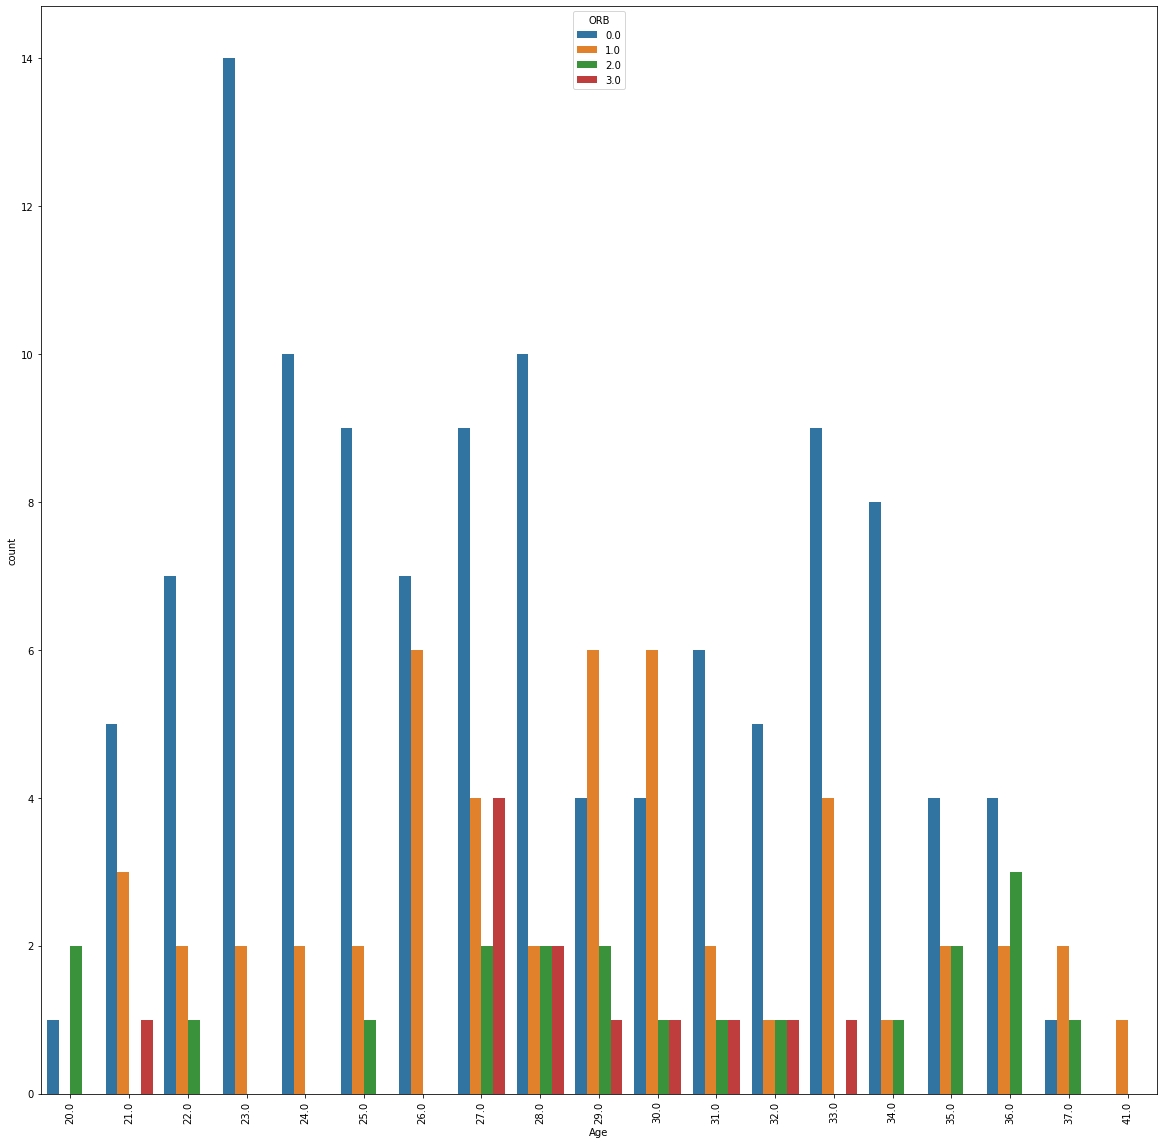

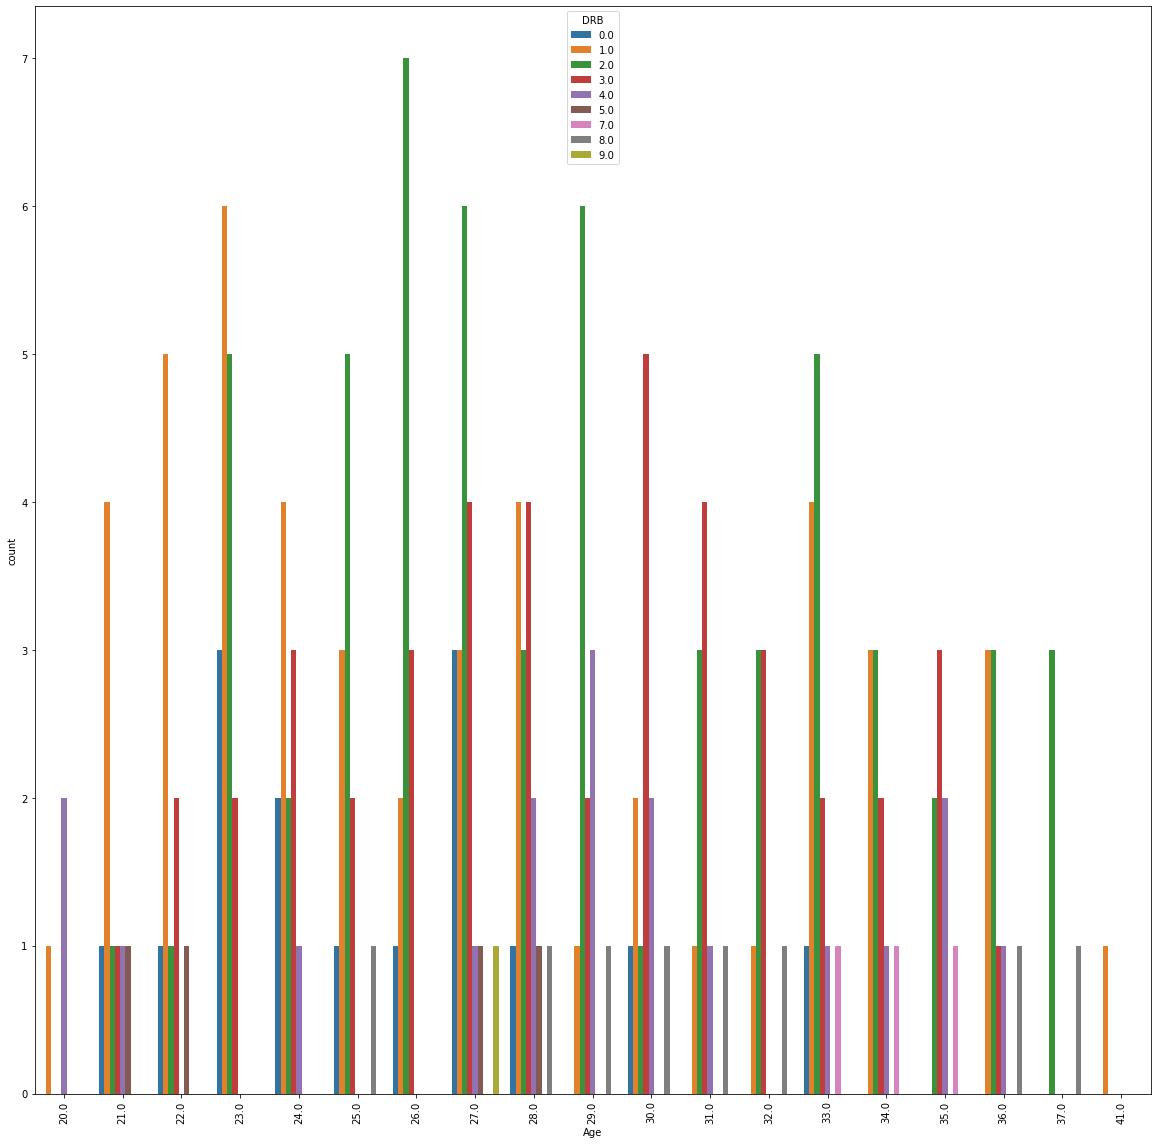

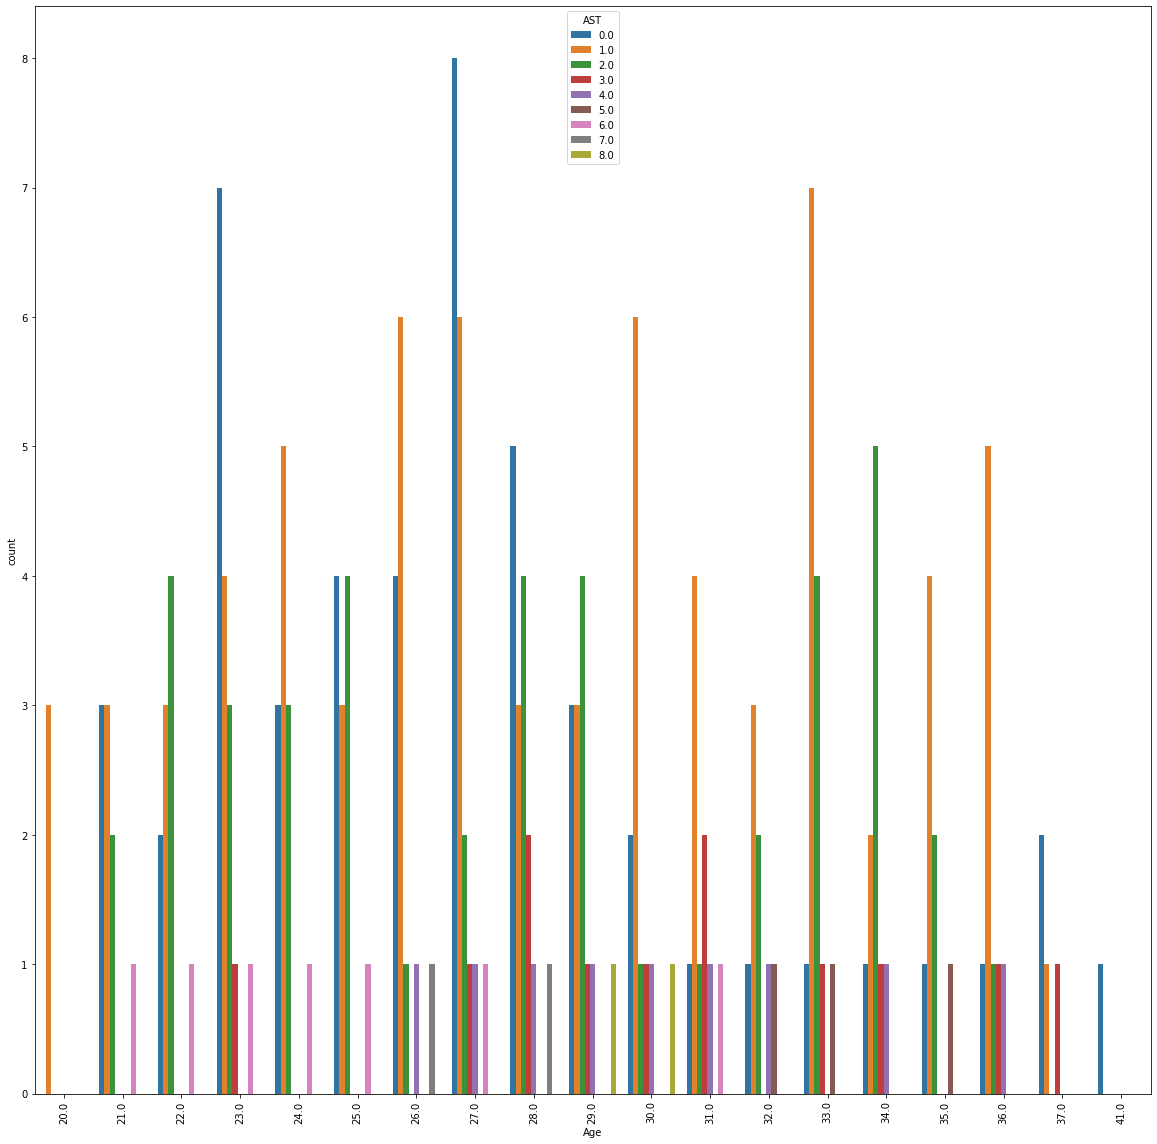

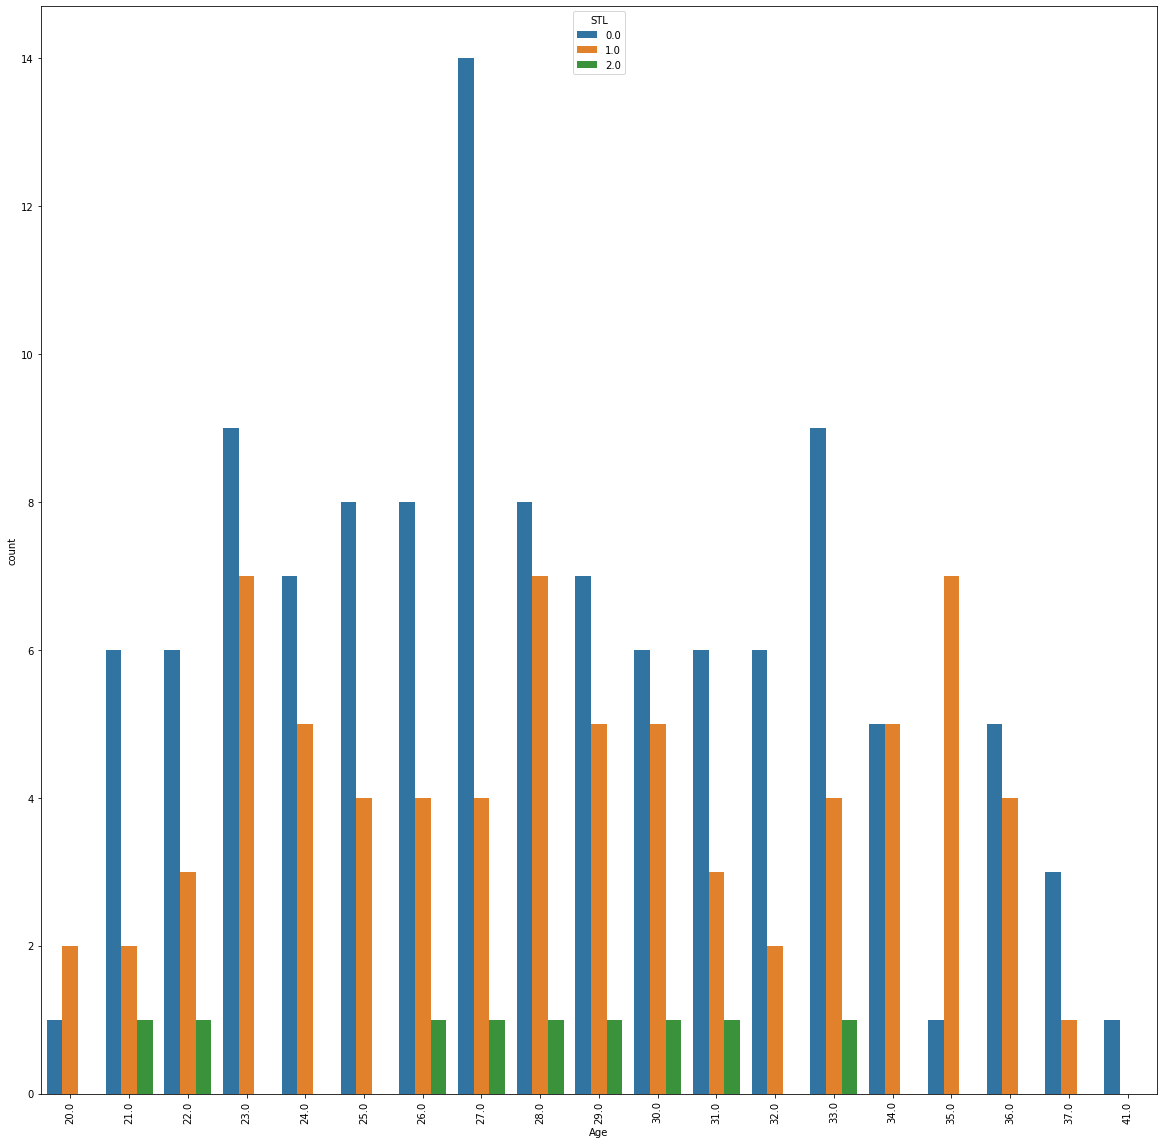

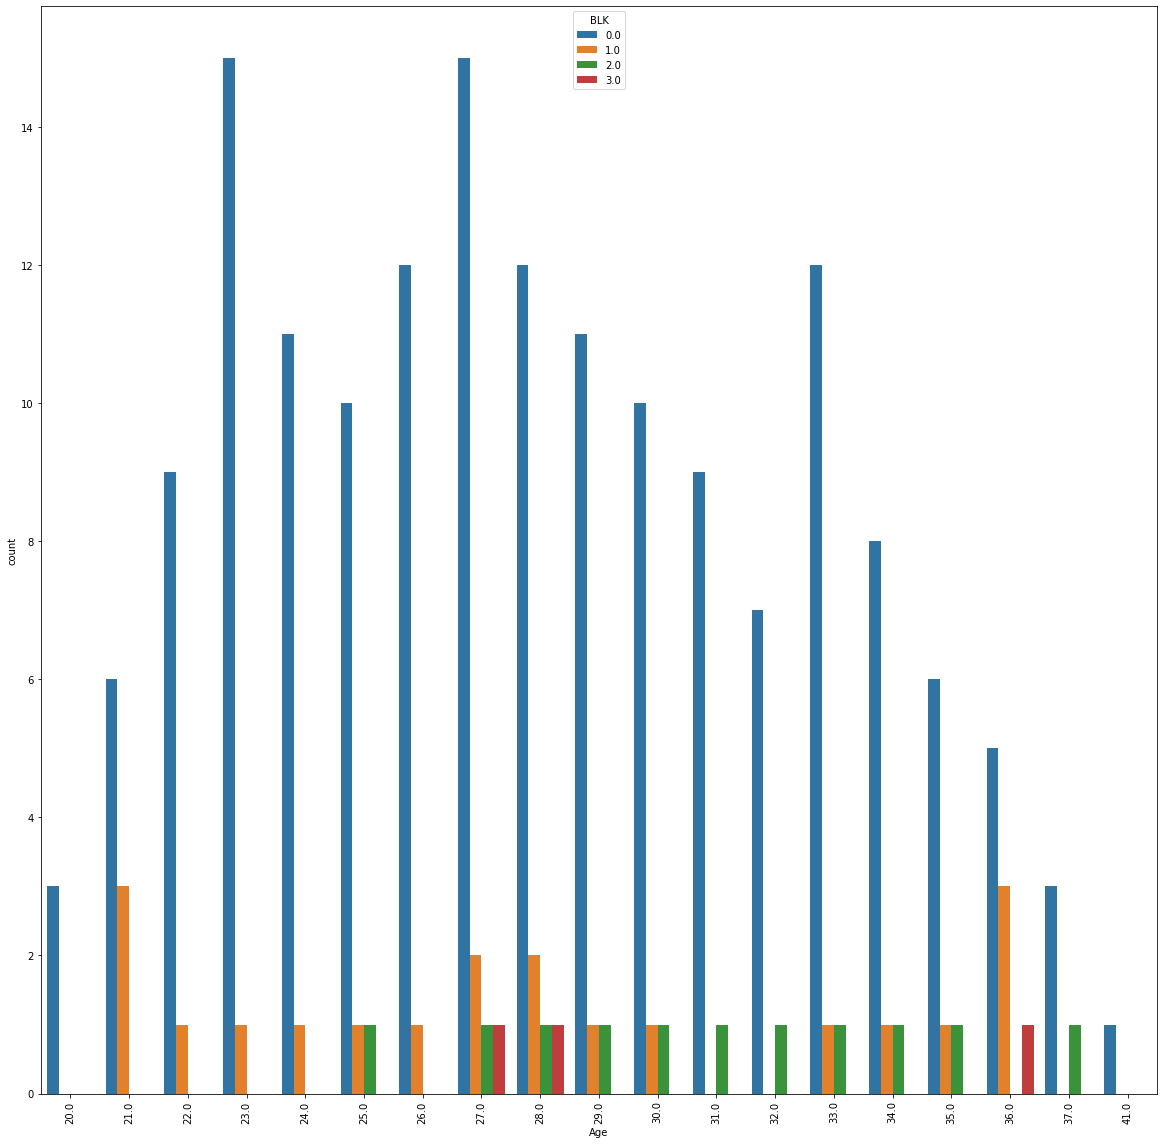

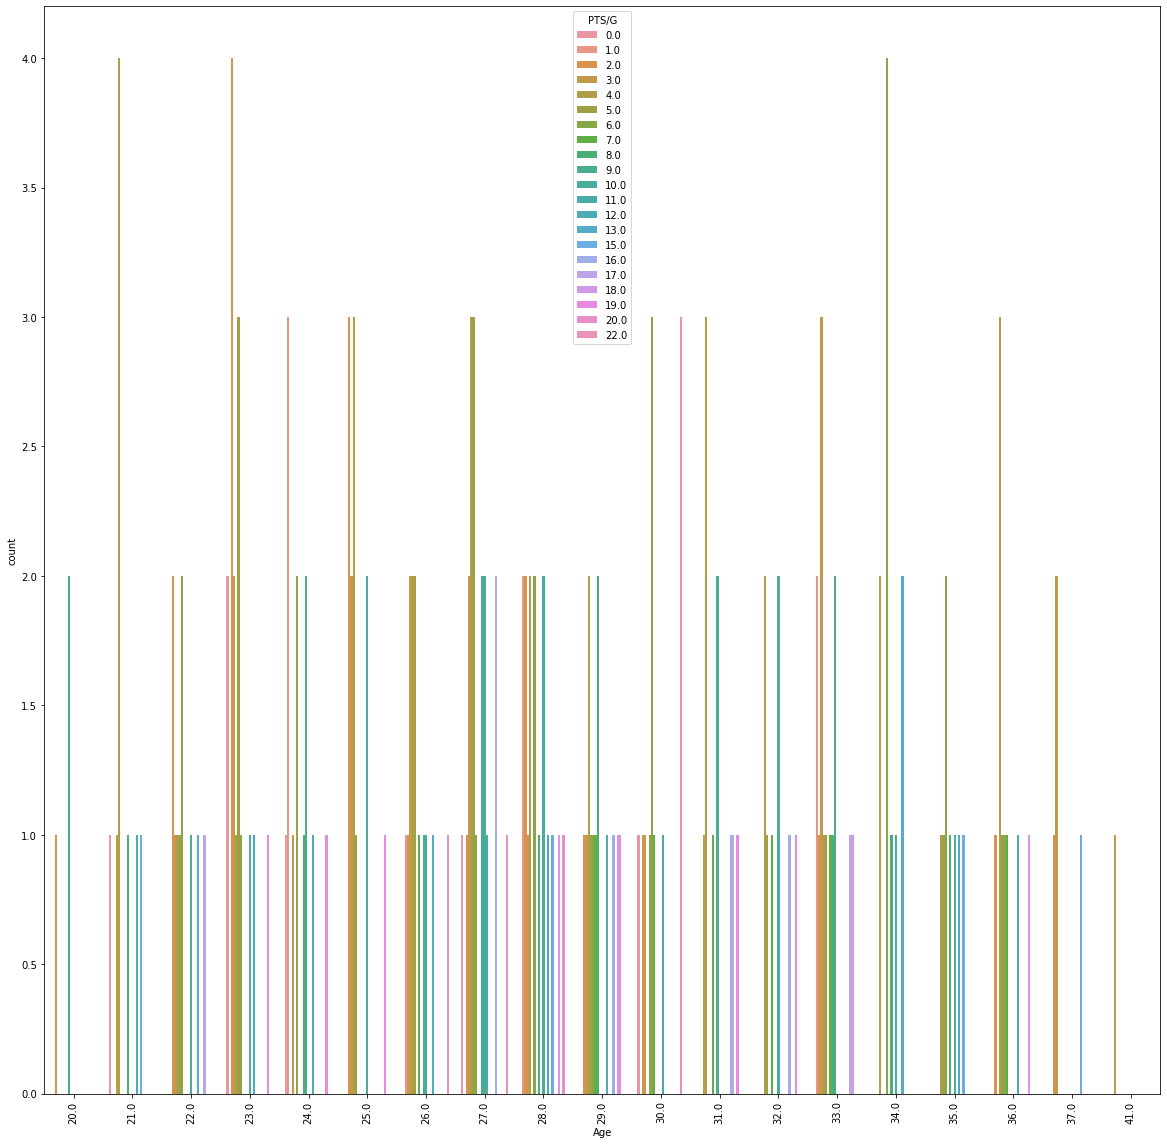

In [85]:
### Visualize###

##HISTOGRAM
df = df.round()
for i in num:
    plt.figure(figsize=(20,20))
    chart = sns.countplot(x = 'Age', hue = i, data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

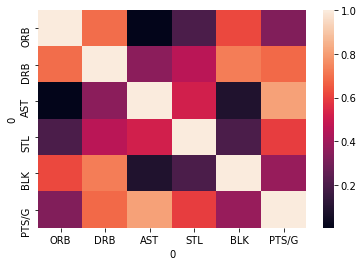

In [84]:
##Checking to see if there are any correlations in the Defensive stats
num = ['ORB', 'DRB', 'AST', 'STL', 'BLK',  'PTS/G']
sns.heatmap(df[num].corr())

In [83]:
## The numeric correlation 
df[num].corr()
    ## Here we can see that there are stron correlations Blocking and Rebounds
    ## There is also a good correlation between Defensive rebound and steals
    ## We can see that more rebounds and steals leads to more points

,Age,ORB,DRB,AST,STL,BLK,PTS/G
0,,,,,,,
Age,1.000000,0.118163,0.207409,0.065090,0.022322,0.133145,0.101192
ORB,0.118163,1.000000,0.694726,0.003128,0.200823,0.618767,0.329428
DRB,0.207409,0.694726,1.000000,0.349745,0.461509,0.730725,0.688455
AST,0.065090,0.003128,0.349745,1.000000,0.520451,0.087318,0.810330
STL,0.022322,0.200823,0.461509,0.520451,1.000000,0.198898,0.596740
BLK,0.133145,0.618767,0.730725,0.087318,0.198898,1.000000,0.377102
PTS/G,0.101192,0.329428,0.688455,0.810330,0.596740,0.377102,1.000000


In [89]:
### Multiple Linear Regression ###

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df[['ORB', 'DRB', 'AST', 'STL', 'BLK']]
y = df['PTS/G']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)

[-0.32275076  1.61489242  1.9084496   0.40106735 -0.41358599]


Text(0, 0.5, 'Y predictions')

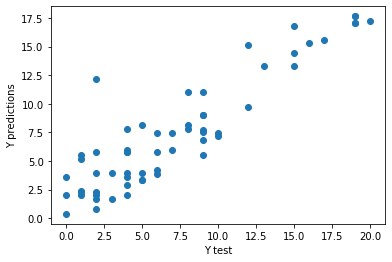

In [90]:
Predictions = lm.predict(X_test)
plt.scatter(y_test, Predictions)
plt.xlabel('Y test')
plt.ylabel('Y predictions')

In [91]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, Predictions)) ## the lower theses values are the better
print(metrics.mean_squared_error(y_test, Predictions))
print(np.sqrt(metrics.mean_absolute_error(y_test, Predictions)))

1.7769317425012632
5.600393352188104
1.3330160323496725


In [96]:
### Try using OLS ###
import statsmodels.api as sm 

def new_model(x, y):   
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    print(model.summary())
    return x

new_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                  PTS/G   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     156.7
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           5.94e-54
Time:                        19:23:13   Log-Likelihood:                -293.64
No. Observations:                 139   AIC:                             599.3
Df Residuals:                     133   BIC:                             616.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3890      0.333      1.167      0.2

,const,ORB,DRB,AST,STL,BLK
86,1.0,0.0,0.0,0.0,0.0,1.0
183,1.0,1.0,5.0,2.0,2.0,1.0
128,1.0,0.0,2.0,2.0,1.0,0.0
54,1.0,0.0,3.0,1.0,0.0,0.0
101,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
64,1.0,0.0,2.0,0.0,0.0,0.0
71,1.0,2.0,3.0,1.0,0.0,0.0
82,1.0,0.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,1.0,0.0,0.0


In [99]:
X_new = X_train.drop(['BLK'], axis = 1)

In [100]:
new_model(X_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  PTS/G   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     195.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           6.32e-55
Time:                        19:25:11   Log-Likelihood:                -294.12
No. Observations:                 139   AIC:                             598.2
Df Residuals:                     134   BIC:                             612.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5144      0.307      1.675      0.0

,const,ORB,DRB,AST,STL
86,1.0,0.0,0.0,0.0,0.0
183,1.0,1.0,5.0,2.0,2.0
128,1.0,0.0,2.0,2.0,1.0
54,1.0,0.0,3.0,1.0,0.0
101,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...
64,1.0,0.0,2.0,0.0,0.0
71,1.0,2.0,3.0,1.0,0.0
82,1.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,1.0,0.0


In [104]:
new_model(X_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  PTS/G   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     260.2
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           6.64e-56
Time:                        19:27:06   Log-Likelihood:                -294.76
No. Observations:                 139   AIC:                             597.5
Df Residuals:                     135   BIC:                             609.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5398      0.306      1.761      0.0

,const,DRB,AST,STL
86,1.0,0.0,0.0,0.0
183,1.0,5.0,2.0,2.0
128,1.0,2.0,2.0,1.0
54,1.0,3.0,1.0,0.0
101,1.0,1.0,1.0,0.0
...,...,...,...,...
64,1.0,2.0,0.0,0.0
71,1.0,3.0,1.0,0.0
82,1.0,0.0,0.0,0.0
12,1.0,0.0,1.0,0.0


In [ ]:
### Using OLS we can conclude that Defensives is not good to determin how much a point a player 
### would make. It would result in a lot of errors. 


Text(0, 0.5, 'Y predictions')

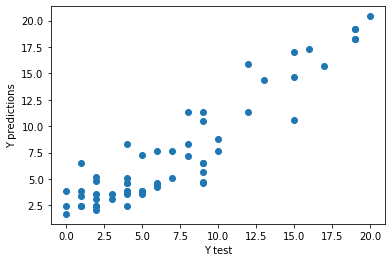

In [109]:
from sklearn.ensemble import RandomForestRegressor
regress = RandomForestRegressor(n_estimators = 10, random_state = 0)
regress.fit(X_train, y_train)
prediction = regress.predict(X_test)
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Y predictions')

In [110]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, prediction)) ## the lower theses values are the better
print(metrics.mean_squared_error(y_test, prediction))
print(np.sqrt(metrics.mean_absolute_error(y_test,prediction)))

1.702388366263366
4.585136725474347
1.3047560562278935


In [ ]:
### We can see that the Random Forest has a better model than the Multiple Linear Regression